# 3 Site Hermitian Ising Model
## Transverse Field Ising Model
The Hamiltonian for the 1D Transverse Field Ising Model is 

\begin{align*}
H &= -J \sum_{i=1}^{N-1} \sigma_i^x \sigma_{i+1}^x - h \sum_{i=1}^{N} \sigma_i^z \\
\end{align*}

In [2]:
from qiskit import QuantumCircuit
import scipy.linalg as la
import numpy as np
from qiskit.primitives import Estimator
from qiskit.quantum_info import Operator, SparsePauliOp
from scipy.optimize import minimize
from qiskit.circuit.library import TwoLocal

J = 1.0
h = 1.0

# H = SparsePauliOp(['ZZII','IZZI','IIZZ','XIII','IXII','IIXI','IIIX'],
#                           [-J, -J, -J, -h, -h, -h, -h])

H = SparsePauliOp(['ZZI','IZZ','XII','IXI','IIX'],
                          [-J, -J, -h, -h, -h])
  
def VQA_1st_Step(theta, Er):

  qc = ansatz.assign_parameters(theta)
  H_minusE = H + SparsePauliOp([H.num_qubits*'I'],[-Er])
  operator = (H_minusE.conjugate() @ H_minusE).simplify()
  estimator = Estimator()
  result = estimator.run(qc, operator).result()
  return result.values[0]


def VQA_2nd_Step(theta):
    
  ## theta contains Er as first element
  Er = theta[0]
  qc = ansatz.assign_parameters(theta[1:])
  H_minusE = H + SparsePauliOp([H.num_qubits*'I'],[-Er])
  operator = (H_minusE.conjugate() @ H_minusE).simplify()
  estimator = Estimator()
  result = estimator.run(qc, operator).result()
  return result.values[0]


def get_energy(Er0):
    
    x0 = np.random.random( len(ansatz.parameters) )

    result1 = minimize(lambda theta: VQA_1st_Step(theta,Er0), x0 = x0, method="BFGS") 

    x1 = np.concatenate(([Er0], result1.x))

    result2 = minimize(VQA_2nd_Step, x0 = x1, method="BFGS") 

    return [ result2.x[0], result2.fun ]

ansatz = TwoLocal(H.num_qubits, ['ry', 'rz'], 'cz',reps=2)
get_energy(0.5)

[np.float64(0.10991626610243453), np.float64(4.103940798305672e-11)]

In [3]:
E0 = -4.0
Eset = []
while (E0 < 4.0):
    
    value = get_energy(E0)
    print(value)
    if value[1] < 1.0e-09:
        Eset.append(value[0])
    E0 += 0.1
    
Eset

[np.float64(-3.493959251579602), np.float64(1.766498058941579e-11)]
[np.float64(-3.493959265885208), np.float64(2.7622348852673895e-12)]
[np.float64(-3.4939592326003033), np.float64(5.0817128283142665e-11)]
[np.float64(-3.493957485702599), np.float64(2.162447998443895e-11)]
[np.float64(-3.4939592222410027), np.float64(3.3644198538240744e-12)]
[np.float64(-3.493959784090377), np.float64(4.311306867066378e-10)]
[np.float64(-3.493959161129301), np.float64(2.254676445545556e-10)]
[np.float64(-3.4939591557817367), np.float64(1.1938894317609083e-11)]
[np.float64(-3.493959170298792), np.float64(1.5287326959878555e-11)]
[np.float64(-3.49395974429893), np.float64(2.1382895454280515e-11)]
[np.float64(-2.6038759200506822), np.float64(1.2121414982857459e-11)]
[np.float64(-2.6038754884768434), np.float64(3.600586495622338e-11)]
[np.float64(-2.6038737861965537), np.float64(4.420286359163583e-11)]
[np.float64(-2.603876154017616), np.float64(7.971401316808624e-12)]
[np.float64(-2.603875082543879), np.

[np.float64(-3.493959251579602),
 np.float64(-3.493959265885208),
 np.float64(-3.4939592326003033),
 np.float64(-3.493957485702599),
 np.float64(-3.4939592222410027),
 np.float64(-3.493959784090377),
 np.float64(-3.493959161129301),
 np.float64(-3.4939591557817367),
 np.float64(-3.493959170298792),
 np.float64(-3.49395974429893),
 np.float64(-2.6038759200506822),
 np.float64(-2.6038754884768434),
 np.float64(-2.6038737861965537),
 np.float64(-2.603876154017616),
 np.float64(-2.603875082543879),
 np.float64(-2.6038744137998857),
 np.float64(-2.6038721361077806),
 np.float64(-2.6038754689956107),
 np.float64(-2.6038750982098855),
 np.float64(-2.603875460909901),
 np.float64(-2.603875438925165),
 np.float64(-2.6038753596342668),
 np.float64(-1.0000001641036167),
 np.float64(-1.0000000540664684),
 np.float64(-1.0000000088287238),
 np.float64(-0.999997110269099),
 np.float64(-0.9999994960022592),
 np.float64(-1.0000000035331054),
 np.float64(-1.0000004183608397),
 np.float64(-1.000000006513

## Plot of Entire Spectrum 
### Comparison b/w Exact Diagonalization and Variational Approach

array([-3.49395921, -2.60387547, -1.        , -0.10991626,  0.10991626,
        1.        ,  2.60387547,  3.49395921])

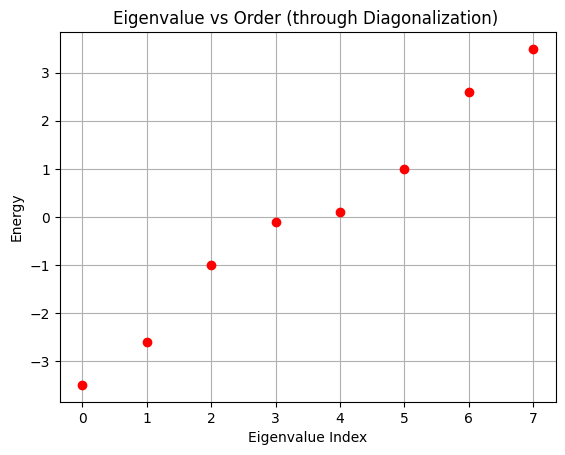

In [7]:
import matplotlib.pyplot as plt

energies = la.eig(H)[0].real
eng = np.sort(energies)
plt.xlabel("Eigenvalue Index")
plt.ylabel("Energy")
plt.plot(eng,'o',color='red')
plt.title("Eigenvalue vs Order (through Diagonalization) ")
plt.grid()
eng

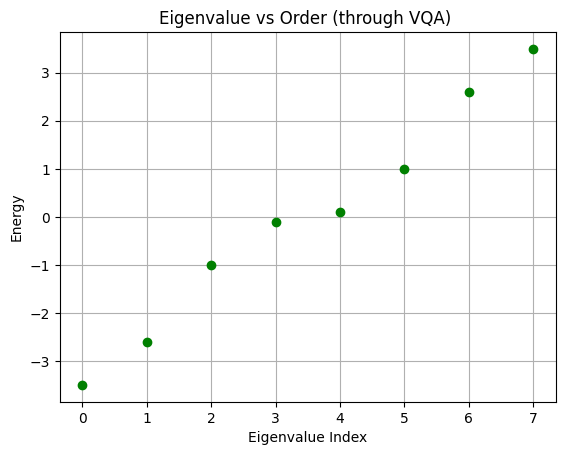

In [8]:
Eset11 = list(set([elem.round(3) for elem in Eset]))
plt.plot(np.sort(Eset11),'o',color='green')
plt.xlabel("Eigenvalue Index")
plt.ylabel("Energy")
plt.title("Eigenvalue vs Order (through VQA) ")
plt.grid()

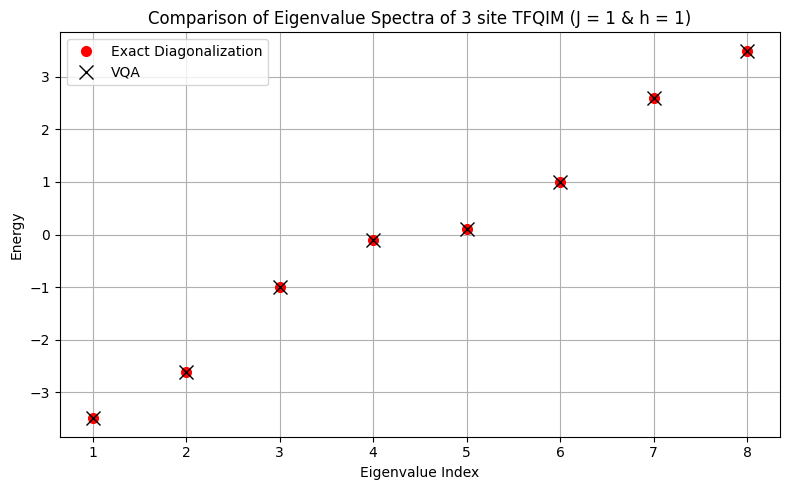

In [11]:
import numpy as np
import matplotlib.pyplot as plt

eng76 = list(set(eng.round(7)))

eigvals_ED = np.sort(eng76)      
eigvals_VQE = np.sort(Eset11) 

plt.figure(figsize=(8,5))
plt.plot(range(1,9), eigvals_ED, 'o', label='Exact Diagonalization', markersize=7,color='red')
plt.plot(range(1,9), eigvals_VQE, 'x', label='VQA', markersize=10,color='black')
plt.xlabel("Eigenvalue Index")
plt.ylabel("Energy")
plt.title("Comparison of Eigenvalue Spectra of 3 site TFQIM (J = 1 & h = 1)")
plt.legend()
plt.grid(which="major")
plt.tight_layout()
plt.show()
